In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [32]:
d0 = pd.read_csv('mnist_train.csv')

In [33]:
d0.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
l = d0['label']
d = d0.drop("label", axis=1)

In [35]:
d.shape

(60000, 784)

In [36]:
l.shape

(60000,)

C:\Users\Irfan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


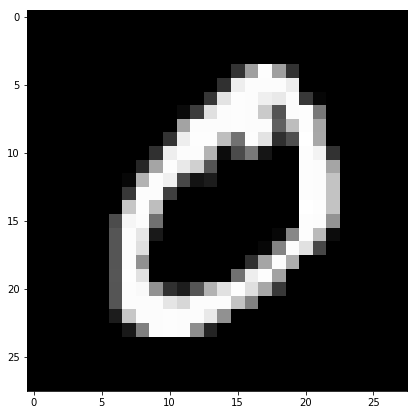

0


In [37]:
plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [38]:
labels = l.head(42000)
data = d.head(42000)

In [39]:
data.shape

(42000, 784)

In [40]:
#Data preprocessing
standardized_data = StandardScaler().fit_transform(data)
standardized_data.shape

C:\Users\Irfan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Irfan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(42000, 784)

In [41]:
sample_data = standardized_data
covar_mat = np.matmul(sample_data.T, sample_data)
covar_mat/42000
covar_mat.shape

(784, 784)

In [42]:
from scipy.linalg import eigh

values , vectors = eigh(covar_mat, eigvals=(782,783))
vectors = vectors.T
vectors.shape

(2, 784)

In [43]:
new_coordinates = np.matmul(vectors, sample_data.T)
new_coordinates.shape

(2, 42000)

In [44]:
new_coordinates = np.vstack((new_coordinates,labels)).T
new_coordinates.shape
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_Principal","2nd_Principal","Label"))
print(dataframe.head())

   1st_Principal  2nd_Principal  Label
0      -4.869650      -0.954865    5.0
1      -7.872841       8.689135    0.0
2       9.182957       2.353300    4.0
3      -3.521128      -6.676095    1.0
4       2.753708      -5.034085    9.0


(42000, 2)